In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
print(tf.__version__)

2.18.0


In [118]:
observations=1000
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))
inputs = np.column_stack((xs, zs))
print(inputs.shape)

(1000, 2)


In [119]:
noise = np.random.uniform(-1, 1, (observations,1))
targets = 13*xs + 7*zs - 12 + noise
np.savez('TF_dataset', inputs=inputs, targets=targets)
print(targets.shape)

(1000, 1)


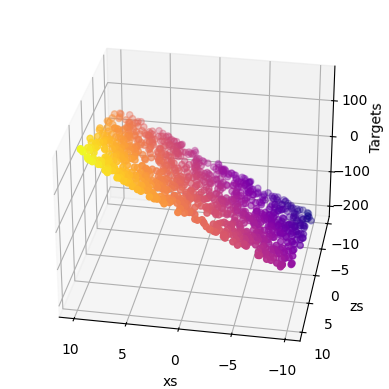

In [120]:
targets = targets.reshape(observations,)
xs = xs.reshape(observations,)
zs = zs.reshape(observations,)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.plot(xs, zs, targets)
ax.scatter(xs, zs, targets, c=targets, cmap='plasma')
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=100)
plt.show()

In [121]:
init_range = 0.1
weigts = np.random.uniform(low=-init_range, high=init_range, size=(2,1))
biases = np.random.uniform(low=-init_range, high=init_range, size=1)
print(weigts,biases)

[[-0.07028169]
 [-0.00460459]] [-0.02393985]


In [122]:
targets = targets.reshape(observations,1) # powrot formy do macierzy
eta = 0.05
for i in range (100):
  outputs = np.dot(inputs, weigts) + biases
  deltas = outputs - targets

  loss = np.sum(deltas ** 2) / 2 / observations
  print(loss)
  #print(i)

  deltas_scaled = deltas / observations

  weigts = weigts - eta * np.dot(inputs.T, deltas_scaled)
  biases = biases - eta * np.sum(deltas_scaled)

3831.9206669083474
1920.8256112067334
1000.2477000177325
540.0316501217001
303.0538975667668
178.01756713679924
110.54759872502534
73.24541578621243
51.99075705687744
39.389103134416494
31.52323911856018
26.299451368674337
22.58960715355353
19.780371672295164
17.534313889580954
15.662575417260518
14.05673195368409
12.652219283025596
11.408647310015322
10.299170528885773
9.304723675291239
8.410875219247835
7.60609208555083
6.880767105240029
6.226660334607779
5.636566362026505
5.104106265132203
4.623589430062825
4.189915498363647
3.7985002040648097
3.445216144669088
3.126343466813521
2.838527584144139
2.5787422117970618
2.344256645454672
2.132606573571784
1.9415679184277488
1.7691333248643455
1.6134909925260932
1.473005598465397
1.3462010931461201
1.2317451802028887
1.1284353121122845
1.0351860520685523
0.9510176678985299
0.8750458374338945
0.8064723567799158
0.7445767536415846
0.6887087174764993
0.6382812668791609
0.5927645823760663
0.5516804398172979
0.51459718586919
0.4811252028123849

In [123]:
print(weigts, biases)

[[12.99792582]
 [ 6.99754929]] [-11.93408719]


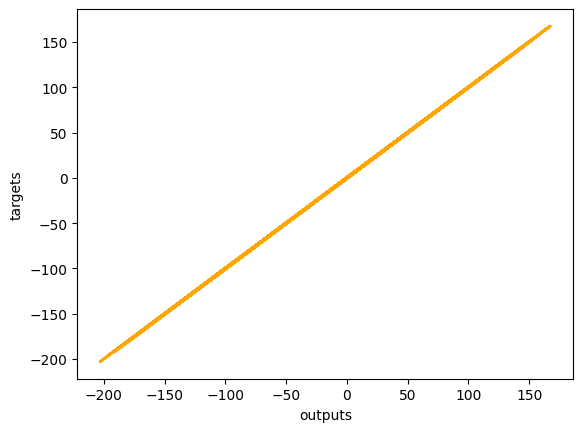

In [124]:
plt.plot(outputs, targets, color='orange')
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()